<a href="https://colab.research.google.com/github/Lupin3-droid/Lupin3-droid/blob/main/mobile_banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#impotring dependancies
import pandas as pd


In [ ]:
#importing out data
file_path='/content/MACHAKOS.xlsx'
data=pd.read_excel(file_path)

In [ ]:
#viewing the data
data.head()

,Year,SACCO Name,Member Age,Loan Uptake (KES),Mobile Banking User,Members
0,2010,Masaku Traders SACCO,32,122757,0,3681
1,2010,Yatta SACCO,35,6703,0,3097
2,2010,Mulleys SACCO,62,115785,0,3215
3,2010,Muka SACCO,35,45758,0,5630
4,2010,Mulleys SACCO,66,93236,0,3447


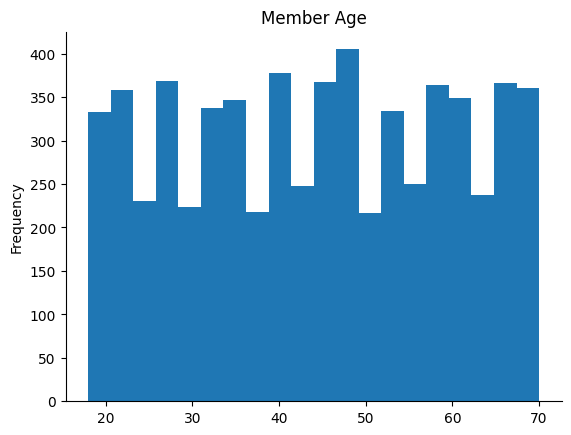

In [ ]:
# @title Member Age

from matplotlib import pyplot as plt
data['Member Age'].plot(kind='hist', bins=20, title='Member Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# prompt: dispay full data

data


,Year,SACCO Name,Member Age,Loan Uptake (KES),Mobile Banking User,Members
0,2010,Masaku Traders SACCO,32,122757,0,3681
1,2010,Yatta SACCO,35,6703,0,3097
2,2010,Mulleys SACCO,62,115785,0,3215
3,2010,Muka SACCO,35,45758,0,5630
4,2010,Mulleys SACCO,66,93236,0,3447
...,...,...,...,...,...,...
6285,2023,Machakos Teachers SACCO,47,167216,1,3697
6286,2023,Masaku Traders SACCO,49,159943,1,2918
6287,2023,Masaku Traders SACCO,22,49916,1,3657
6288,2023,Machakos Teachers SACCO,53,122563,1,2155


In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 6290 non-null   int64 
 1   SACCO Name           6290 non-null   object
 2   Member Age           6290 non-null   int64 
 3   Loan Uptake (KES)    6290 non-null   int64 
 4   Mobile Banking User  6290 non-null   int64 
 5   Members              6290 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 295.0+ KB


In [ ]:
data.describe()

,Year,Member Age,Loan Uptake (KES),Mobile Banking User,Members
count,6290.000000,6290.000000,6290.000000,6290.000000,6290.000000
mean,2017.791733,44.216852,103268.179173,0.819555,3483.304293
std,3.885120,15.236411,56583.803862,0.384588,849.987841
min,2010.000000,18.000000,5024.000000,0.000000,1825.000000
25%,2015.000000,31.000000,52990.500000,1.000000,2824.500000
50%,2018.000000,44.000000,103556.000000,1.000000,3416.000000
75%,2021.000000,57.000000,152407.000000,1.000000,4031.000000
max,2023.000000,70.000000,199944.000000,1.000000,6457.000000


In [ ]:
#creating a subset of our dataset that is of our interest.
dropped=['Year','SACCO Name','Member Age','Loan Uptake (KES)']
data2=data.drop(columns=dropped,axis=1)
data2.head()

,Mobile Banking User,Members
0,0,3681
1,0,3097
2,0,3215
3,0,5630
4,0,3447


In [ ]:
data2['Mobile Banking User'].value_counts()

,count
Mobile Banking User,
1,5155
0,1135


In [ ]:
#importing the logistic regression model and balancing the weights for my data
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight



In [ ]:
# IMPORTING TRAIN TEST AND SPLIT THE DATA
from sklearn.model_selection import train_test_split

In [ ]:
#selecting our data and separating features from target variable
X=data2.drop('Mobile Banking User',axis=1)
y=data2['Mobile Banking User']


In [ ]:
#splitting my data target and features while balancing the weight to make sure data used for model training is balanced
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5032, 1), (1258, 1), (5032,), (1258,))

In [ ]:
#model fitting and data balancing
model=LogisticRegression(class_weight='balanced',max_iter=1100)
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1100)

In [ ]:
#predict using the model
y_pred=model.predict(X_train)
#model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_train,y_pred)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.34      0.67      0.45       908
           1       0.91      0.72      0.80      4124

    accuracy                           0.71      5032
   macro avg       0.63      0.69      0.63      5032
weighted avg       0.81      0.71      0.74      5032



In [ ]:
# prompt: test the p-value

from scipy.stats import ttest_ind

# Assuming y_train and y_pred are already defined from the previous code
# Perform t-test
t_statistic, p_value = ttest_ind(y_train, y_pred)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference between the groups.")

NameError: name 'y_train' is not defined

<Axes: >

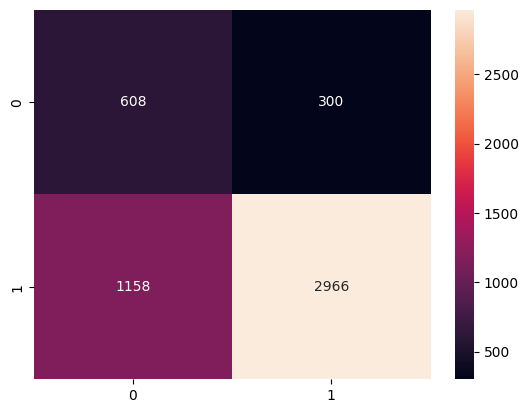

In [ ]:
#display the confusion matrix
confusion_matrix(y_train,y_pred)
#display it as a heatmap
import seaborn as sns
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True,fmt='g')


In [ ]:
#predictions using the test data.
y_pred=model.predict(X_test)

In [ ]:
#model evaluation
accuracy_score(y_test,y_pred)

0.7074721780604134

<Axes: >

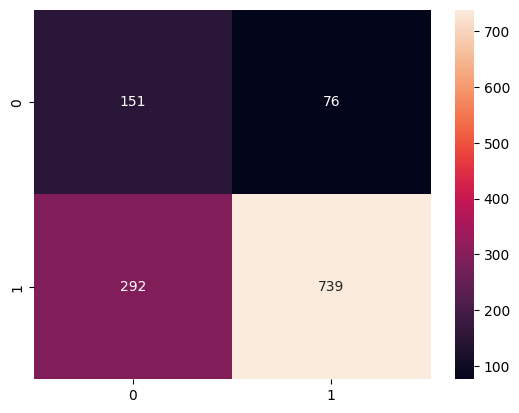

In [ ]:
#display confusion matrix using a heatmap
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')